In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN

In [10]:
df = pd.read_csv('creditcard.csv').drop_duplicates()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### ниже просто хочу посмотреть, не отсортирован ли датасет по целевому признаку

In [17]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [18]:
df[df['Class']==1].index

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)

In [14]:
df.shape

(283726, 31)

#### сбалансированность == False

In [8]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### пропуски?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### исходя из description все колонки обезличены, только time - время в секундах, прошедшее с момента совершения первой операции в датасете до текущей, amount - сумма транзакции и Class - фрод/не фрод (целевая) интерпретируемы. Решил поисследовать сумму

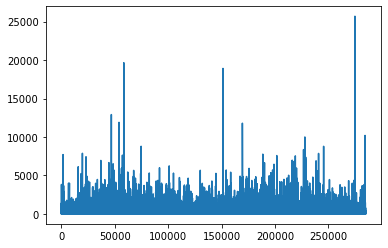

In [39]:
df['Amount'].plot();

In [33]:
max_amounts = df['Amount'].sort_values(ascending=False)[:10].index
df.loc[max_amounts]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0
227921,145283.0,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,...,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
74699,55709.0,-16.950064,-16.417395,-12.523381,6.555638,-27.752964,18.072031,28.504065,-10.152220,2.124673,...,-5.932594,0.050097,-10.855949,1.550407,-0.502172,0.821714,12.152401,-4.009839,8790.26,0
245474,152763.0,-14.641710,-28.554825,-12.714462,5.878264,-7.855074,2.471004,11.922577,-2.651203,-2.223985,...,5.788207,-3.269671,-8.024556,0.423021,-2.396701,-0.633380,-1.763704,1.422017,8787.00,0


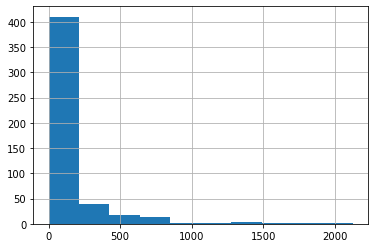

In [38]:
df['Amount'][df['Class']==1].hist();

In [3]:
#shuffle and manual train-test split
def data_shuffle_split(df, train_size=0.8):
    df = df.sample(frac=1).reset_index(drop=True)
    X = df.drop('Class', axis = 1).values
    y = df['Class'].values
    
    X_train = X[:int(train_size*len(df))]
    y_train = y[:int(train_size*len(df))]
    
    X_test = X[int(train_size*len(df)):]
    y_test = y[int(train_size*len(df)):]
    
    return X_train, y_train, X_test, y_test

In [15]:
#аугментация
def augmentation(X_train, y_train, undersampling=True):
    if undersampling:
        augm = TomekLinks(sampling_strategy='majority', n_jobs=-1)
        return augm.fit_resample(np.array(X_train), np.array(y_train))
    else:
        augm = ADASYN(random_state=123, n_jobs=-1)
        return augm.fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
#нормализация
def normalize(X_train, train=True, mean = None, std = None):
    if train:
        mean = X_train.mean(axis=0)
        std = X_train.std(axis=0)

        X_train_normed = (X_train - mean)/std

        return X_train_normed, mean, std
    else:
        return (X_train - mean)/std, mean, std

In [58]:
#создание полиномиальных признаков
def create_polinomial(X, degree = 2):
    return PolynomialFeatures(degree).fit_transform(X)

In [12]:
#splitting
X_train, y_train, X_test, y_test = data_shuffle_split(df)

In [16]:
#undersampling
X_train_tomek, y_train_tomek = augmentation(X_train, y_train)
#X_train_adasyn, y_train_adasyn = augmentation(X_train, y_train, undersampling=False)

In [23]:
#61 rows gone
len(X_train), len(X_train_tomek)

(226980, 226919)

In [41]:
#data normalization
X_train_normed, mean, std = normalize(X_train_tomek, mean = None, std = None)
y_train_normed = y_train_tomek
X_test, mean, std = normalize(X_test, train=False, mean = mean, std = std)
#y_test = y_test

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [30]:
#я взял 3 модели с дефолтными параметрами для сравнения (только распараллелил какие можно и для воспроизводимости зафиксировал
#random_state)
ridge = linear_model.RidgeClassifier(random_state=123)
knn = KNeighborsClassifier(n_jobs=-1)
logreg = linear_model.LogisticRegression(random_state=123, n_jobs=-1)

In [39]:
def get_metrics(alg, X_train, y_train, X_test, y_test):
    alg.fit(X_train, y_train)
    preds = alg.predict(X_test)
    print(metrics.classification_report(y_test, preds))

In [52]:
get_metrics(ridge, X_train_normed, y_train_normed, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.82      0.45      0.58        94

    accuracy                           1.00     56746
   macro avg       0.91      0.72      0.79     56746
weighted avg       1.00      1.00      1.00     56746



In [54]:
get_metrics(knn, X_train_normed, y_train_normed, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.85      0.61      0.71        94

    accuracy                           1.00     56746
   macro avg       0.93      0.80      0.85     56746
weighted avg       1.00      1.00      1.00     56746



In [55]:
get_metrics(logreg, X_train_normed, y_train_normed, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56652
           1       0.08      0.39      0.13        94

    accuracy                           0.99     56746
   macro avg       0.54      0.69      0.56     56746
weighted avg       1.00      0.99      0.99     56746



In [60]:
#сравним, добавив полиномиальные признаки
X_train_poly = create_polinomial(X_train_normed)
X_test_poly = create_polinomial(X_test)
X_train_poly.shape, X_test_poly.shape

((226919, 496), (56746, 496))

In [61]:
get_metrics(ridge, X_train_poly, y_train_normed, X_test_poly, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.86      0.40      0.55        94

    accuracy                           1.00     56746
   macro avg       0.93      0.70      0.78     56746
weighted avg       1.00      1.00      1.00     56746



In [63]:
get_metrics(knn, X_train_poly, y_train_normed, X_test_poly, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.82      0.53      0.65        94

    accuracy                           1.00     56746
   macro avg       0.91      0.77      0.82     56746
weighted avg       1.00      1.00      1.00     56746



In [62]:
get_metrics(logreg, X_train_poly, y_train_normed, X_test_poly, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.75      0.19      0.31        94

    accuracy                           1.00     56746
   macro avg       0.87      0.60      0.65     56746
weighted avg       1.00      1.00      1.00     56746



In [64]:
#без аугментации
#normalize + poly
X_train_normed, mean, std = normalize(X_train, mean = None, std = None)
y_train_normed = y_train
X_test, mean, std = normalize(X_test, train=False, mean = mean, std = std)
X_train_poly = create_polinomial(X_train_normed)
X_test_poly = create_polinomial(X_test)
X_train_poly.shape, X_test_poly.shape
#y_test = y_test

((226980, 496), (56746, 496))

In [65]:
get_metrics(ridge, X_train_poly, y_train_normed, X_test_poly, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.40      0.33      0.36        94

    accuracy                           1.00     56746
   macro avg       0.70      0.66      0.68     56746
weighted avg       1.00      1.00      1.00     56746



In [66]:
get_metrics(knn, X_train_poly, y_train_normed, X_test_poly, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.86      0.13      0.22        94

    accuracy                           1.00     56746
   macro avg       0.93      0.56      0.61     56746
weighted avg       1.00      1.00      1.00     56746



In [67]:
get_metrics(logreg, X_train_poly, y_train_normed, X_test_poly, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.70      0.07      0.13        94

    accuracy                           1.00     56746
   macro avg       0.85      0.54      0.57     56746
weighted avg       1.00      1.00      1.00     56746



#### Вывод:
без аугментации recall существенно снизился

In [71]:
#попробую train-test split со стратификацией по целевому
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis = 1).values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [72]:
X_train_tomek, y_train_tomek = augmentation(X_train, y_train)

In [74]:
X_train_normed, mean, std = normalize(X_train_tomek, mean = None, std = None)
y_train_normed = y_train_tomek
X_test, mean, std = normalize(X_test, train=False, mean = mean, std = std)
#y_test = y_test

In [76]:
get_metrics(ridge, X_train_normed, y_train_normed, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.44      0.60        95

    accuracy                           1.00     56746
   macro avg       0.98      0.72      0.80     56746
weighted avg       1.00      1.00      1.00     56746



In [78]:
get_metrics(knn, X_train_normed, y_train_normed, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.79      0.86        95

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [79]:
get_metrics(logreg, X_train_normed, y_train_normed, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.63      0.76        95

    accuracy                           1.00     56746
   macro avg       0.98      0.82      0.88     56746
weighted avg       1.00      1.00      1.00     56746



#### Вывод:
нет ощутимой разницы в recall

In [82]:
#попробую cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring = 'recall', n_jobs=-1).mean()

0.5875443262411347

In [86]:
#добавляю параметр class_weight
logreg = linear_model.LogisticRegression(class_weight='balanced',random_state=123, n_jobs=-1)
cross_val_score(logreg, X, y, cv=10, scoring = 'recall', n_jobs=-1).mean()

0.8947695035460992

In [88]:
#recall вырос, оценка ROC-AUC
cross_val_score(logreg, X, y, cv=10, scoring = 'roc_auc', n_jobs=-1).mean()

0.9864630208169686